# Prediction Using SMOTE + Randome Forest

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import the dataset into pandas dataframe

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Job-a-thon/train_CC lead.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Job-a-thon/test_CC lead.csv")

In [4]:
# explore the train dataset

train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train.shape

(245725, 11)

In [6]:
# explore the test dataset

test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [7]:
test.shape

(105312, 10)

In [8]:
# Check DataTypes of each column

train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [9]:
# Check Distribution of CC Leads status

train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

The Data is imbalanced!

In [10]:
train['Is_Lead'].value_counts(normalize = True)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

Text(0.5, 1.0, 'Lead_Status')

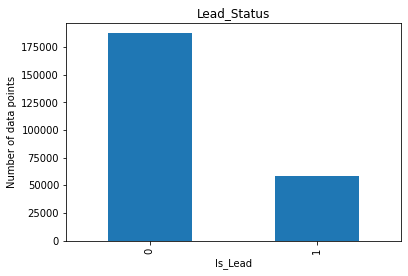

In [11]:
train['Is_Lead'].value_counts().plot.bar()
plt.xlabel('Is_Lead')
plt.ylabel('Number of data points')
plt.title('Lead_Status')

# Univariate Analysis

### Frequency Distribution of Categorical Independent Variables

In [12]:
# Gender

train['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Text(0.5, 1.0, 'Gender')

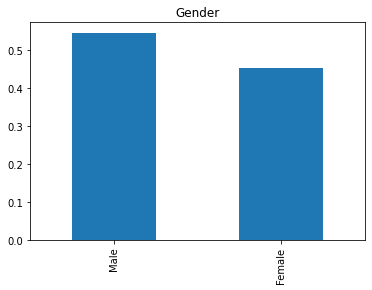

In [13]:
train['Gender'].value_counts(normalize = True).plot.bar()
plt.title('Gender')

In [14]:
# Region_Code

train['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [15]:
train['Region_Code'].nunique()    #number of unique regions

35

<Figure size 2160x2160 with 0 Axes>

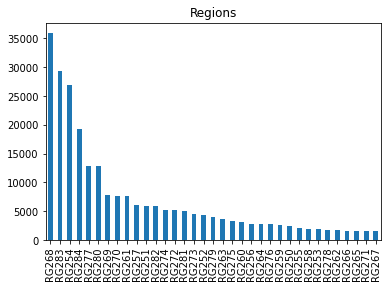

<Figure size 2160x2160 with 0 Axes>

In [16]:
train['Region_Code'].value_counts().plot.bar()
plt.title('Regions')
plt.figure(figsize = (30,30))

In [17]:
# Occupation

train['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

Text(0.5, 1.0, 'Occupation')

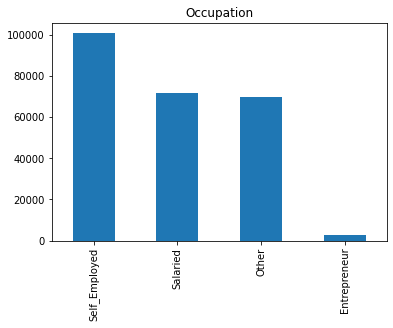

In [18]:
train['Occupation'].value_counts().plot.bar()
plt.title('Occupation')

In [19]:
# Channel_Code

train['Channel_Code'].unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

Text(0.5, 1.0, 'Sourcing Channel')

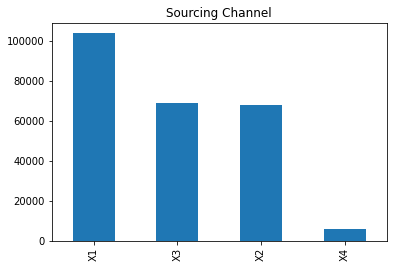

In [20]:
train['Channel_Code'].value_counts().plot.bar()
plt.title('Sourcing Channel')

In [21]:
#Credit_Product

train['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

Text(0.5, 1.0, 'Credit Product Availed?')

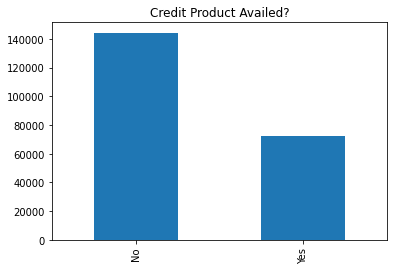

In [22]:
train['Credit_Product'].value_counts().plot.bar()
plt.title('Credit Product Availed?')

In [23]:
# Credit_Product has Nan values. Needs to be treated

In [24]:
# Is_Active

train['Is_Active'].unique()

array(['No', 'Yes'], dtype=object)

Text(0.5, 1.0, 'Account Active?')

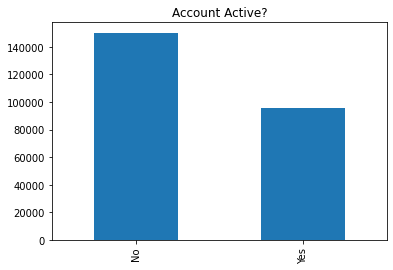

In [25]:
train['Is_Active'].value_counts().plot.bar()
plt.title('Account Active?')

### Inference

* The data is almost equally distributed among genders. Number of Males are slightly higher, but that depicts the general population distribution of the country as well

* Majority of the data is available from regions RG268, RG283, RG254. This could be because these regions have higher customer base. It can be assumed that these regions lie in metro cities. But any specific trend in these regions will highly impact our model

* There are very few Entrepeneurs in the data. They can be clubbed with 'Other' to make our data clean

* X4-channel sourced customers are very few in the dataset. Since this is an encoded column, we can't predict much about it.

* Relatively higher number of customers are not availing any credit product

* A higher number of customers are not active in last 3 months. This could be linked to high number of Jandhan accounts opened and not operated since

### Visualize Numerical Independent Variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


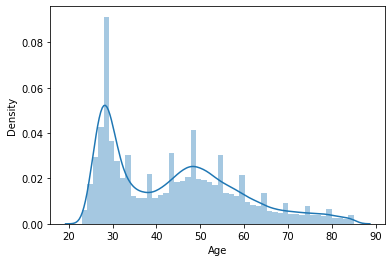

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


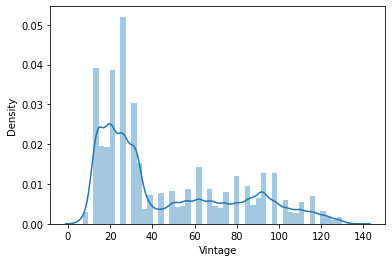

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


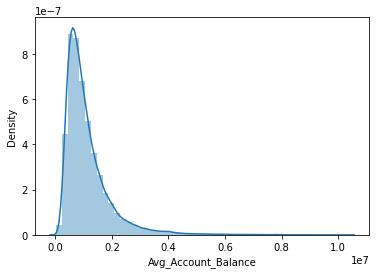

In [26]:
numeric = ['Age', 'Vintage', 'Avg_Account_Balance']

for i in numeric:
    sns.distplot(train[i], label = i)
    plt.show()

### Inference

* All the numeric columns are right-skewed

* Curve of Age is multimodal with right skewness

* Vintage is right skewed. Most accounts are less than 40 months (3 year 4 month) old

* Average Account Balance is also rightly presented in the graph. Majority accounts have very low average balance. Only a few Preferred and HNI customers maintain high balance. This could also be attributed to high number of Jandhan accounts opened with zero balance

# Bivariate Analysis

### Compare Categorical Independent Variables with Dependent Variable

In [27]:
categorical = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

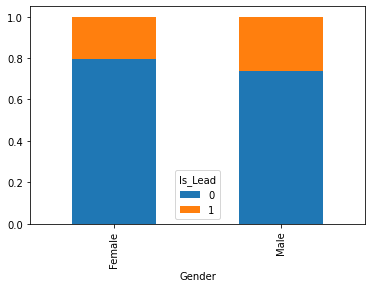

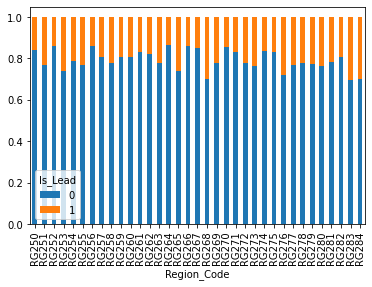

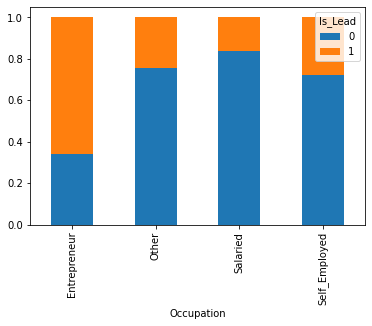

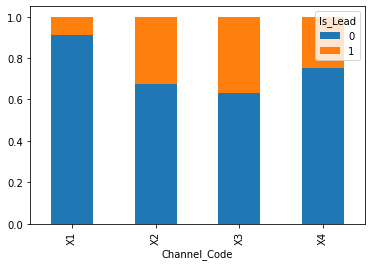

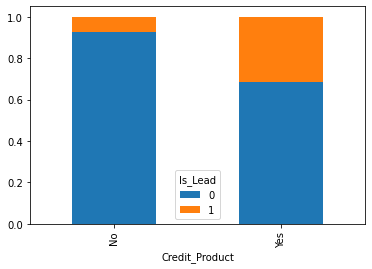

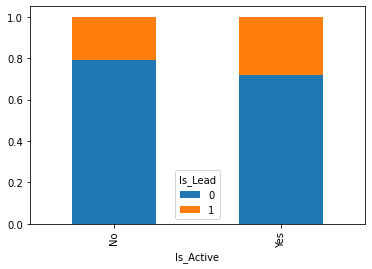

In [28]:
for item in categorical:
    plot = pd.crosstab(train[item], train['Is_Lead'])
    plot.div(plot.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
    plt.show()

### Inference

* Lead does not depend on Gender
* Ratio of Leads is almost same for all Regions, ranging from 0.15 to 0.30
* Chances of having leads among entrepreneurs is high compared to other occupations. We had earlier planned to merge Entrepreneurs with others because of their small presence in the data. However, this revelation shows the importance of Entrepreneurs and is required seprately in the dataset
* Leads are particularly low for X1 Channel. Since this is an encoded column, we can't predict much about it
* Chances of havng a lead are more with people availing a Credit Product. This was already expected, because customers availing a Credit Product are expected to have a better financial condition and social status and would thus require Credit Card.

* A deeper delve into the data could be helpful. Like, if a person has 1 Credit Card, he is likely to avail another with more offers. On the other hand, a person with 2+ Credit Cards is not expected to avail one more Credit Card unless our Card gives some extra-ordinary offers. However, this data is not provided at the moment

### Compare Numerical Independent Variables with Dependent Variable

In [29]:
numeric

['Age', 'Vintage', 'Avg_Account_Balance']

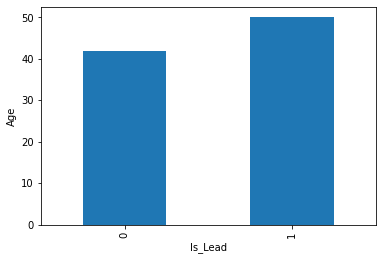

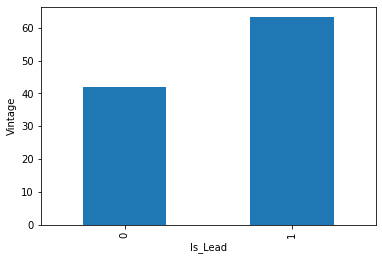

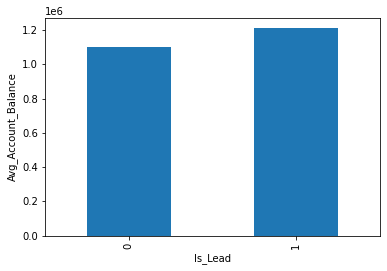

In [30]:
for i in numeric:
    train.groupby('Is_Lead')[i].mean().plot.bar()
    plt.ylabel(i)
    plt.show()

### Inference

* A higher aged person is more likely to be a lead for Credit Card

* Customer having higher vintage is more likely to be a lead

* Average Account balance is not a big game changer.

# Data Wrangling

In [31]:
# Let's keep our original datasets safe and create copies to manipulate the data

train_df = train.copy()
test_df = test.copy()

In [32]:
# Treatment of NaN

train_df.isna().sum()     #Check number of NaN values in train_df

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [33]:
test_df.isna().sum()    #Check number of NaN values in test_df

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [34]:
# Make a combined dataframe of train and test datasets

combi_df = train_df.append(test_df, ignore_index = True)

In [35]:
# Replace NaN values in Credit_Product with its mode in combi_df

train_df['Credit_Product'].fillna(value = combi_df['Credit_Product'].mode()[0], inplace = True)
train_df.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [36]:
test_df['Credit_Product'].fillna(value = combi_df['Credit_Product'].mode()[0], inplace = True)
test_df.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

## Normalization of Skewed Data

As we saw, columns Age, Vintage, Avg_Acc_Balance were right skewed. Let us normalize these columns

In [37]:
train_df1 = train_df.copy()
test_df1 = test_df.copy()

### Age

#### train_df

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


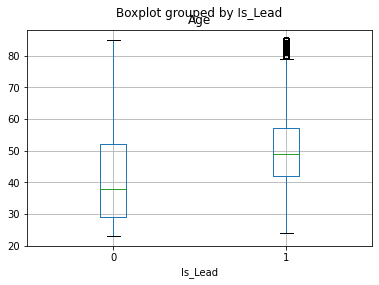

In [38]:
train_df1.boxplot(column = 'Age', by = 'Is_Lead')

In [39]:
train_df1['Age'].describe()

count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


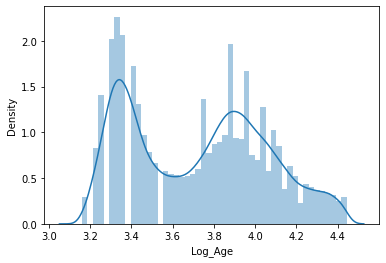

In [40]:
# Log Normalization on train_df

train_df1['Log_Age'] = np.log(train_df1['Age'])

sns.distplot(train_df1['Log_Age'], label = 'Log_Age')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


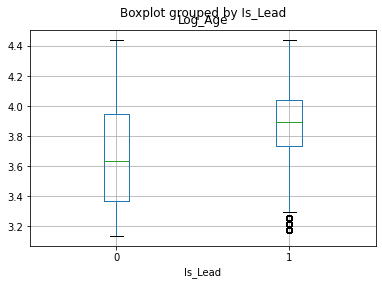

In [41]:

train_df1.boxplot(column = 'Log_Age', by = 'Is_Lead')

In [42]:
Log_Age_drop = train_df1[train_df1['Is_Lead'] == 1][train_df1['Log_Age'] <= 3.3].index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [43]:
train_df1.drop(index = Log_Age_drop, inplace = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


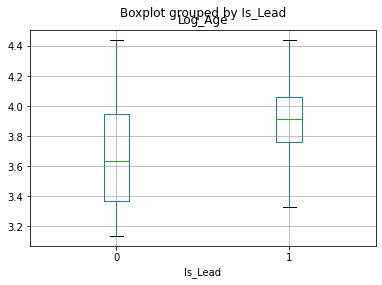

In [44]:
train_df1.boxplot(column = 'Log_Age', by = 'Is_Lead')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


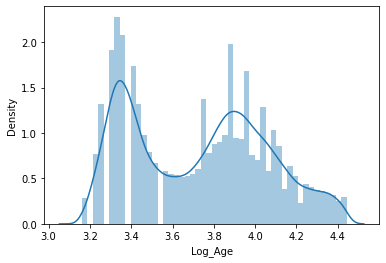

In [45]:
sns.distplot(train_df1['Log_Age'], label = 'Log_Age')

In [46]:
# drop the original Age column

train_df1.drop(columns = 'Age', inplace = True)

### Age

#### test_df

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


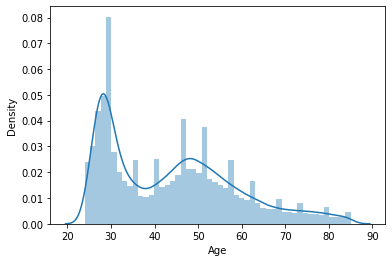

In [47]:
sns.distplot(test_df1['Age'], label = 'Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


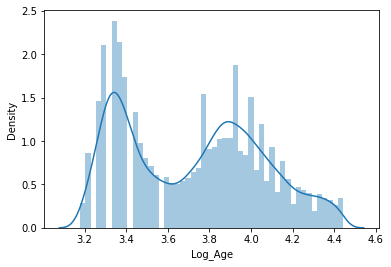

In [48]:
# Log Normalization test_df

test_df1['Log_Age'] = np.log(test_df1['Age'])

sns.distplot(test_df1['Log_Age'], label = 'Log_Age')

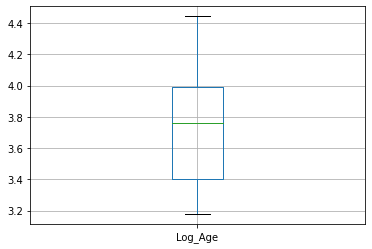

In [49]:
test_df1.boxplot(column = 'Log_Age')

In [50]:
# drop original Age column from test_df

test_df1.drop(columns = 'Age', inplace = True)

### Vintage

#### train_df

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


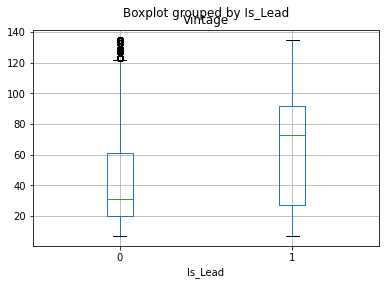

In [51]:
train_df1.boxplot(column = 'Vintage', by = 'Is_Lead')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


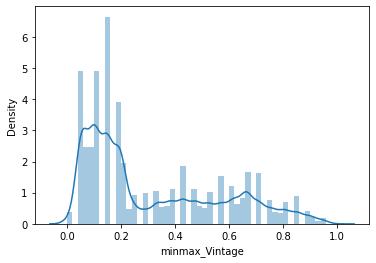

In [52]:
# Min-Max Normalization on train_df

def minmax(x):
    upper = x.max()
    lower = x.min()
    y = (x - lower) / (upper - lower)
    return y

train_df1['minmax_Vintage'] = minmax(train_df1['Vintage'])

sns.distplot(train_df1['minmax_Vintage'], label = 'MinMax_Vintage')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


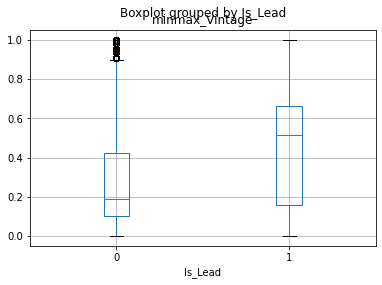

In [53]:
train_df1.boxplot(column = 'minmax_Vintage', by = 'Is_Lead')

There are some outliers in Is_Lead = 0
Let's explore how many are there

In [54]:
train_df1[train_df1['minmax_Vintage'] > 0.9][train_df1['Is_Lead'] == 0].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1674, 12)

This is a small number. We can drop these outliers

In [55]:
minmax_Vintage_drop = train_df1[train_df1['minmax_Vintage'] > 0.9][train_df1['Is_Lead'] == 0].index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [56]:
train_df1.drop(index = minmax_Vintage_drop, inplace = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


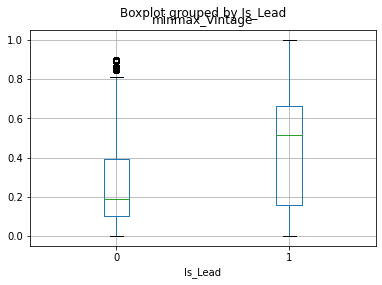

In [57]:
train_df1.boxplot(column = 'minmax_Vintage', by = 'Is_Lead')

In [58]:
# drop original vintage column from train_df

train_df1.drop(columns = 'Vintage', inplace = True)

### Vintage
#### test_df

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


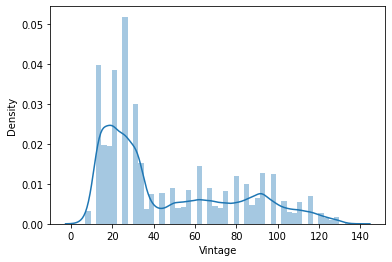

In [59]:
# test_df

sns.distplot(test_df1['Vintage'], label = 'Vintage')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


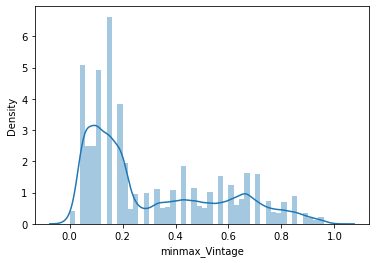

In [60]:
# Min-Max Normalization on test_df

test_df1['minmax_Vintage'] = minmax(test_df1['Vintage'])

sns.distplot(test_df1['minmax_Vintage'], label = 'MinMax_Vintage')

In [61]:
# drop original vintage column from test_df

test_df1.drop(columns = 'Vintage', inplace = True)

### Avg_Account_Balance
#### train_df

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


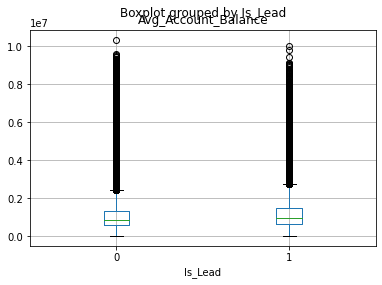

In [62]:
train_df1.boxplot(column = 'Avg_Account_Balance', by = 'Is_Lead')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


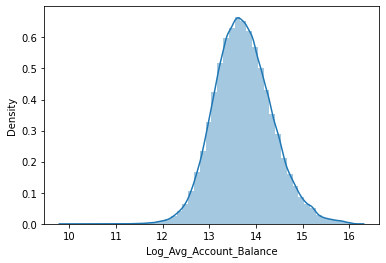

In [63]:
# Log Transformation on train_df

train_df1['Log_Avg_Account_Balance'] = np.log(train_df1['Avg_Account_Balance'])

sns.distplot(train_df1['Log_Avg_Account_Balance'], label = 'Log_Avg_Account_Balance')

In [64]:
train_df1['Log_Avg_Account_Balance'].describe()

count    242160.000000
mean         13.732067
std           0.619017
min           9.942227
25%          13.311013
50%          13.702973
75%          14.125857
max          16.152691
Name: Log_Avg_Account_Balance, dtype: float64

The Data is normalized, however, the range has become high

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


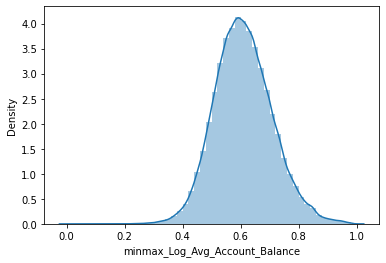

In [65]:
# Log MinMax Normalization on train_df

train_df1['minmax_Log_Avg_Account_Balance'] = minmax(train_df1['Log_Avg_Account_Balance'])

sns.distplot(train_df1['minmax_Log_Avg_Account_Balance'], label = 'MinMax_Log_Avg_Account_Balance')

Log MinMax gives a normalized output of a small range

In [66]:
# drop original Avg_Account_Balance and Log_Avg_Account_Balance columns from train_df

train_df1.drop(columns = ['Avg_Account_Balance', 'Log_Avg_Account_Balance'], inplace = True)

### Avg_Account_Balance
#### test_df

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


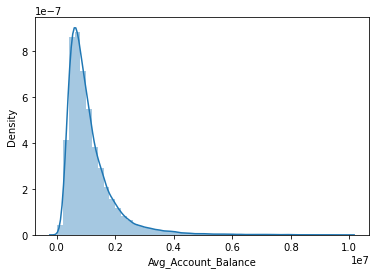

In [67]:
sns.distplot(test_df1['Avg_Account_Balance'], label = 'Avg_Account_Balance')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


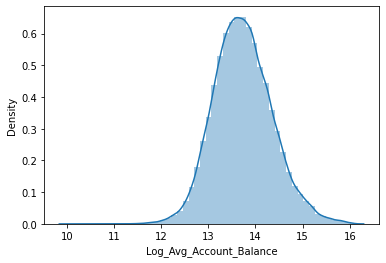

In [68]:
# Log Transformation on test_df

test_df1['Log_Avg_Account_Balance'] = np.log(test_df1['Avg_Account_Balance'])

sns.distplot(test_df1['Log_Avg_Account_Balance'], label = 'Log_Avg_Account_Balance')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


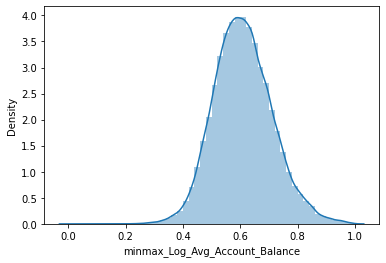

In [69]:
# Log MinMax Normalization on test_df

test_df1['minmax_Log_Avg_Account_Balance'] = minmax(test_df1['Log_Avg_Account_Balance'])

sns.distplot(test_df1['minmax_Log_Avg_Account_Balance'], label = 'MinMax_Log_Avg_Account_Balance')

In [70]:
# drop original Avg_Account_Balance column from test_df

test_df1.drop(columns = ['Avg_Account_Balance', 'Log_Avg_Account_Balance'], inplace = True)

In [71]:
train_df1.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Is_Lead,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance
0,NNVBBKZB,Female,RG268,Other,X3,No,No,0,4.290459,0.281250,0.630865
1,IDD62UNG,Female,RG277,Salaried,X1,No,No,0,3.401197,0.195312,0.536510
2,HD3DSEMC,Female,RG268,Self_Employed,X3,No,Yes,0,4.025352,0.148438,0.687265
3,BF3NC7KV,Male,RG270,Salaried,X1,No,No,0,3.526361,0.093750,0.502253
4,TEASRWXV,Female,RG282,Salaried,X1,No,No,0,3.401197,0.203125,0.604324


In [72]:
test_df1.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance
0,VBENBARO,Male,RG254,Other,X1,Yes,No,3.367296,0.140625,0.574028
1,CCMEWNKY,Male,RG268,Other,X2,No,No,3.761200,0.328125,0.610280
2,VK3KGA9M,Male,RG270,Salaried,X1,No,No,3.433987,0.054688,0.371049
3,TT8RPZVC,Male,RG272,Other,X1,No,No,3.367296,0.203125,0.599743
4,SHQZEYTZ,Female,RG270,Other,X1,No,No,3.367296,0.093750,0.553969


## Categorical Data to Numeric Data for Machine Learning

In [73]:
train_df2 = train_df1.copy()
test_df2 = test_df1.copy()

### Gender
Female = 0, Male = 1

In [74]:
train_df2['Gender'].replace({'Female' : 0, 'Male' : 1}, inplace = True)
test_df2['Gender'].replace({'Female' : 0, 'Male' : 1}, inplace = True)

In [75]:
train_df2['Gender'].unique()

array([0, 1])

### Credit_Product
No = 0, Yes = 1

In [76]:
train_df2['Credit_Product'].replace({'No' : 0, 'Yes' : 1}, inplace = True)
test_df2['Credit_Product'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

In [77]:
train_df2['Credit_Product'].unique()

array([0, 1])

### Is_Active
No = 0, Yes = 1

In [78]:
train_df2['Is_Active'].replace({'No' : 0, 'Yes' : 1}, inplace = True)
test_df2['Is_Active'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

In [79]:
train_df2['Is_Active'].unique()

array([0, 1])

### Occupation
get_dummies

#### train_df

In [80]:
train_occupation = pd.get_dummies(train_df2['Occupation'], prefix = 'Occu')

In [81]:
train_df3 = pd.concat([train_df2, train_occupation], axis = 1)

train_df3.drop(columns = 'Occupation', inplace = True)

In [82]:
train_df3.head()

,ID,Gender,Region_Code,Channel_Code,Credit_Product,Is_Active,Is_Lead,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance,Occu_Entrepreneur,Occu_Other,Occu_Salaried,Occu_Self_Employed
0,NNVBBKZB,0,RG268,X3,0,0,0,4.290459,0.281250,0.630865,0,1,0,0
1,IDD62UNG,0,RG277,X1,0,0,0,3.401197,0.195312,0.536510,0,0,1,0
2,HD3DSEMC,0,RG268,X3,0,1,0,4.025352,0.148438,0.687265,0,0,0,1
3,BF3NC7KV,1,RG270,X1,0,0,0,3.526361,0.093750,0.502253,0,0,1,0
4,TEASRWXV,0,RG282,X1,0,0,0,3.401197,0.203125,0.604324,0,0,1,0


#### test_df

In [83]:
test_occupation = pd.get_dummies(test_df2['Occupation'], prefix = 'Occu')

In [84]:
test_df3 = pd.concat([test_df2, test_occupation], axis = 1)

test_df3.drop(columns = 'Occupation', inplace = True)

In [85]:
test_df3.head()

,ID,Gender,Region_Code,Channel_Code,Credit_Product,Is_Active,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance,Occu_Entrepreneur,Occu_Other,Occu_Salaried,Occu_Self_Employed
0,VBENBARO,1,RG254,X1,1,0,3.367296,0.140625,0.574028,0,1,0,0
1,CCMEWNKY,1,RG268,X2,0,0,3.761200,0.328125,0.610280,0,1,0,0
2,VK3KGA9M,1,RG270,X1,0,0,3.433987,0.054688,0.371049,0,0,1,0
3,TT8RPZVC,1,RG272,X1,0,0,3.367296,0.203125,0.599743,0,1,0,0
4,SHQZEYTZ,0,RG270,X1,0,0,3.367296,0.093750,0.553969,0,1,0,0


### Channel_Code
get_dummies

#### train_df

In [86]:
train_channel = pd.get_dummies(train_df3['Channel_Code'], prefix = 'Channel')

In [87]:
train_df4 = pd.concat([train_df3, train_channel], axis = 1)

train_df4.drop(columns = 'Channel_Code', inplace = True)

In [88]:
train_df4.head()

,ID,Gender,Region_Code,Credit_Product,Is_Active,Is_Lead,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance,Occu_Entrepreneur,Occu_Other,Occu_Salaried,Occu_Self_Employed,Channel_X1,Channel_X2,Channel_X3,Channel_X4
0,NNVBBKZB,0,RG268,0,0,0,4.290459,0.281250,0.630865,0,1,0,0,0,0,1,0
1,IDD62UNG,0,RG277,0,0,0,3.401197,0.195312,0.536510,0,0,1,0,1,0,0,0
2,HD3DSEMC,0,RG268,0,1,0,4.025352,0.148438,0.687265,0,0,0,1,0,0,1,0
3,BF3NC7KV,1,RG270,0,0,0,3.526361,0.093750,0.502253,0,0,1,0,1,0,0,0
4,TEASRWXV,0,RG282,0,0,0,3.401197,0.203125,0.604324,0,0,1,0,1,0,0,0


#### test_df

In [89]:
test_channel = pd.get_dummies(test_df3['Channel_Code'], prefix = 'Channel')

In [90]:
test_df4 = pd.concat([test_df3, test_channel], axis = 1)

test_df4.drop(columns = 'Channel_Code', inplace = True)

In [91]:
test_df4.head()

,ID,Gender,Region_Code,Credit_Product,Is_Active,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance,Occu_Entrepreneur,Occu_Other,Occu_Salaried,Occu_Self_Employed,Channel_X1,Channel_X2,Channel_X3,Channel_X4
0,VBENBARO,1,RG254,1,0,3.367296,0.140625,0.574028,0,1,0,0,1,0,0,0
1,CCMEWNKY,1,RG268,0,0,3.761200,0.328125,0.610280,0,1,0,0,0,1,0,0
2,VK3KGA9M,1,RG270,0,0,3.433987,0.054688,0.371049,0,0,1,0,1,0,0,0
3,TT8RPZVC,1,RG272,0,0,3.367296,0.203125,0.599743,0,1,0,0,1,0,0,0
4,SHQZEYTZ,0,RG270,0,0,3.367296,0.093750,0.553969,0,1,0,0,1,0,0,0


## Region_Code
#### get_dummies

### train

In [92]:
train_regions = pd.get_dummies(train_df4['Region_Code'])

In [93]:
train_df5 = pd.concat([train_df4, train_regions], axis = 1)

train_df5.drop(columns = 'Region_Code', inplace = True)

In [94]:
train_df5.head()

,ID,Gender,Credit_Product,Is_Active,Is_Lead,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance,Occu_Entrepreneur,Occu_Other,Occu_Salaried,Occu_Self_Employed,Channel_X1,Channel_X2,Channel_X3,Channel_X4,RG250,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284
0,NNVBBKZB,0,0,0,0,4.290459,0.281250,0.630865,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,IDD62UNG,0,0,0,0,3.401197,0.195312,0.536510,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,HD3DSEMC,0,0,1,0,4.025352,0.148438,0.687265,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BF3NC7KV,1,0,0,0,3.526361,0.093750,0.502253,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TEASRWXV,0,0,0,0,3.401197,0.203125,0.604324,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### test_df

In [95]:
test_regions = pd.get_dummies(test_df4['Region_Code'])

In [96]:
test_df5 = pd.concat([test_df4, test_regions], axis = 1)

test_df5.drop(columns = 'Region_Code', inplace = True)

In [97]:
test_df5.head()

,ID,Gender,Credit_Product,Is_Active,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance,Occu_Entrepreneur,Occu_Other,Occu_Salaried,Occu_Self_Employed,Channel_X1,Channel_X2,Channel_X3,Channel_X4,RG250,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284
0,VBENBARO,1,1,0,3.367296,0.140625,0.574028,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CCMEWNKY,1,0,0,3.761200,0.328125,0.610280,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,VK3KGA9M,1,0,0,3.433987,0.054688,0.371049,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TT8RPZVC,1,0,0,3.367296,0.203125,0.599743,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,SHQZEYTZ,0,0,0,3.367296,0.093750,0.553969,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## ID
Drop column

#### train_df

In [98]:
train_df5.drop(columns = 'ID', inplace = True)

In [99]:
train_df5.head()

,Gender,Credit_Product,Is_Active,Is_Lead,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance,Occu_Entrepreneur,Occu_Other,Occu_Salaried,Occu_Self_Employed,Channel_X1,Channel_X2,Channel_X3,Channel_X4,RG250,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284
0,0,0,0,0,4.290459,0.281250,0.630865,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,3.401197,0.195312,0.536510,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,4.025352,0.148438,0.687265,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,3.526361,0.093750,0.502253,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3.401197,0.203125,0.604324,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### test_df

In [100]:
test_df5.drop(columns = 'ID', inplace = True)

In [101]:
test_df5.head()

,Gender,Credit_Product,Is_Active,Log_Age,minmax_Vintage,minmax_Log_Avg_Account_Balance,Occu_Entrepreneur,Occu_Other,Occu_Salaried,Occu_Self_Employed,Channel_X1,Channel_X2,Channel_X3,Channel_X4,RG250,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284
0,1,1,0,3.367296,0.140625,0.574028,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,3.761200,0.328125,0.610280,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,3.433987,0.054688,0.371049,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,3.367296,0.203125,0.599743,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,3.367296,0.093750,0.553969,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Multicollinearity
### Detection, HeatMap, VIF

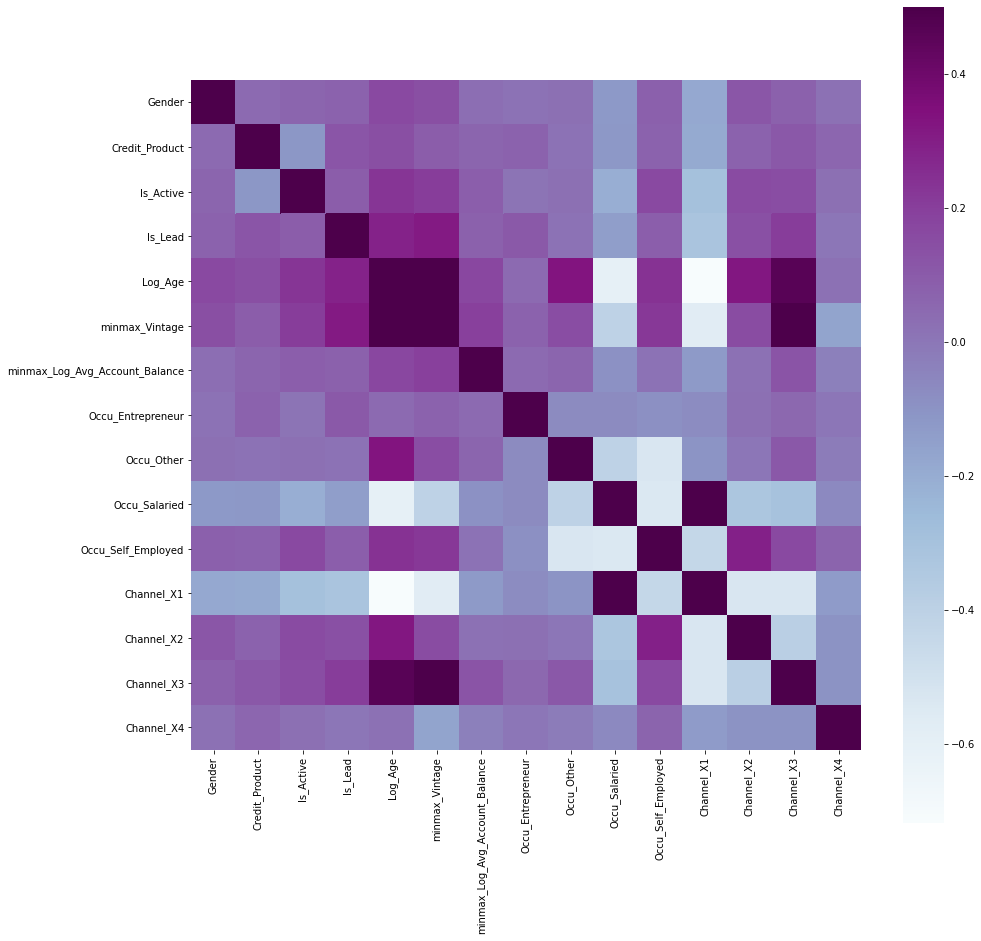

In [102]:
# Heat Map

temp_df = train_df4.drop(columns = ['Region_Code', 'ID'])
matrix = temp_df.corr()

fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(matrix, vmax = 0.5, square= True, cmap = 'BuPu', ax=ax)

* Age and Vintage are highly correlated
* Channel X3 and Vintage are also correlated
* Channel X1 and Occupation Salaried are also correlated

In [103]:
# Variable Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [104]:
calc_vif(train_df4.drop(columns = ['Region_Code', 'ID']))

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Gender,1.040835
1,Credit_Product,1.082286
2,Is_Active,1.137258
3,Is_Lead,1.168596
4,Log_Age,3.006007
5,minmax_Vintage,2.165693
6,minmax_Log_Avg_Account_Balance,1.052248
7,Occu_Entrepreneur,inf
8,Occu_Other,inf
9,Occu_Salaried,inf


Occupation and Channel Dummies have infinite correlateion. This is because they are One hot encoded and part of same column

Age and vintage also have a high VIF

In [105]:
train_df6 = train_df4.copy()
test_df6 = test_df4.copy()

In [106]:
train_df6.drop(columns = ['Log_Age', 'Occu_Salaried', 'Channel_X3'], inplace = True)
calc_vif(train_df6.drop(columns = ['Region_Code', 'ID']))

,variables,VIF
0,Gender,2.247753
1,Credit_Product,1.517571
2,Is_Active,1.844439
3,Is_Lead,1.511619
4,minmax_Vintage,4.601140
5,minmax_Log_Avg_Account_Balance,14.243323
6,Occu_Entrepreneur,1.093313
7,Occu_Other,2.420208
8,Occu_Self_Employed,3.488016
9,Channel_X1,3.825899


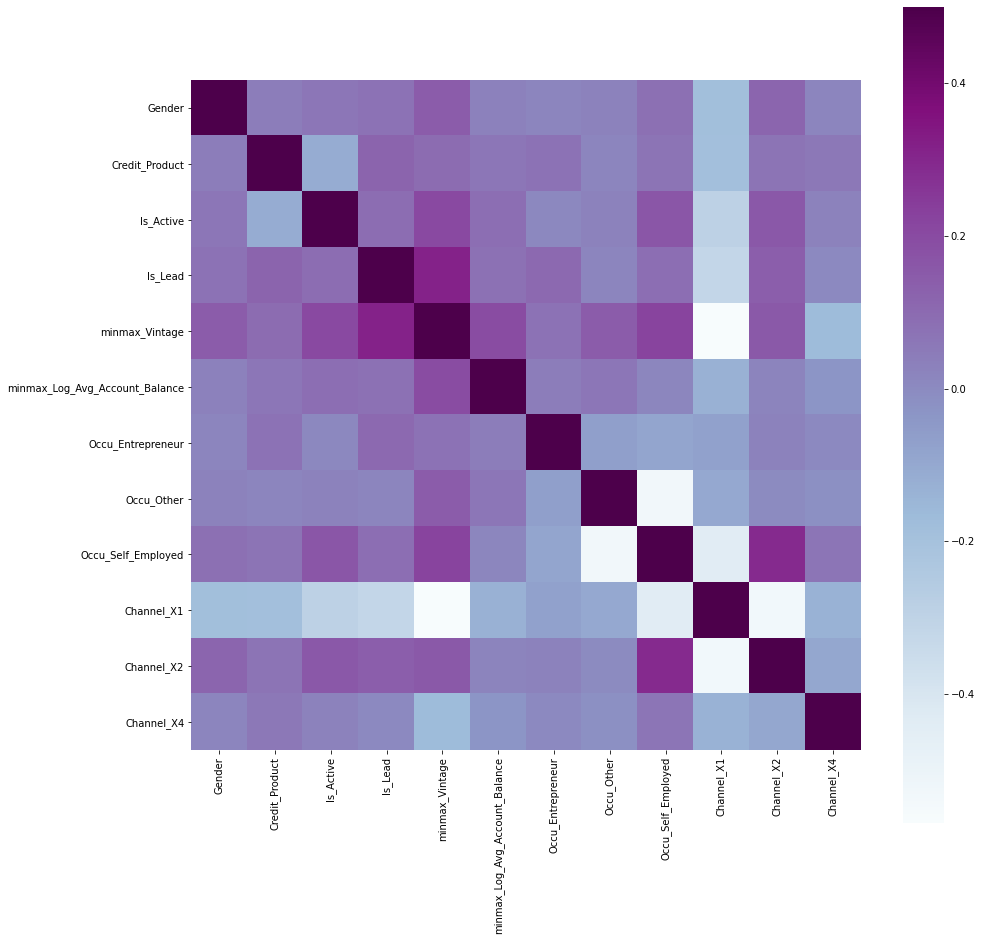

In [107]:
# Heat Map

temp_df2 = train_df6.drop(columns = ['Region_Code', 'ID'])
matrix = temp_df2.corr()

fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(matrix, vmax = 0.5, square= True, cmap = 'BuPu', ax=ax)

We can remove X3, Salaried and Log_Age columns to remove multicollinearity

In [108]:
train_df7 = train_df5.drop(columns = ['Channel_X3', 'Occu_Salaried', 'Log_Age'])
test_df7 = test_df5.drop(columns = ['Channel_X3', 'Occu_Salaried', 'Log_Age'])

# Model Building

In [109]:
X = train_df7.drop(columns = 'Is_Lead')
y = train_df7['Is_Lead']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
# split the data into train data and test data.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

## SMOTE

In [112]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(X))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 242160
Resampled dataset shape 371526


In [113]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

### SMOTE + Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [115]:
# Hyperparameter tuning

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [116]:
rf_preds  = classifier.predict(x_test)

In [117]:
# Obtain accuracy on test set
accuracy_score(y_test,rf_preds)

0.7106559362635588

In [129]:
# import roc_auc_score of sklearn

from sklearn.metrics import roc_auc_score

In [118]:
# Calculate roc_auc score on test set
roc_auc_score(y_test,rf_preds)

0.7110015142703059

In [121]:
test_rf_pred = classifier.predict(test_df7)

## Submission

In [122]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Job-a-thon/submission_CC lead.csv")

In [123]:
submission['Is_Lead'] = test_rf_pred

In [124]:
submission['ID'] = test_df4['ID']

In [125]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [126]:
submission.isna().sum()

ID         0
Is_Lead    0
dtype: int64

In [127]:
submission['Is_Lead'].value_counts()

1    53663
0    51649
Name: Is_Lead, dtype: int64

In [128]:
pd.DataFrame(submission, columns = ['ID', 'Is_Lead']).to_csv("/content/drive/MyDrive/Colab Notebooks/Job-a-thon/submission_forest.csv", index = False)